<a href="https://colab.research.google.com/github/ChristianSosa22/info-proyecto-3/blob/main/demos/SP1_02_Demo_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO #02

What you will learn:


*   How to manipulate Datasets with Pandas
*   What is Tensorflow and how to use it
*   How to create Neural Networks for Regression and Classification Tasks



# Pandas (Dataset Manipulation)

"*pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.*"

[Panda's Official Documentation](https://pandas.pydata.org)

-----

Pandas is a powerful library used to manipulate and analyze data. This library imitates R's philosophy and Sintax (both are very similar!)

Pandas is powerful at **manipulating structured data**, so keep in mind this library will shine with table-looking shaped datasets.
In few lines, you can do a lot of stuff!

Advantages:
* Provides efficient and optimized ways to manipulate data
* Supports multiple file formats
* Can easily merge, divide, join, filter and other type of operations in a similar fashion to SQL!

Limitaitons:
* Can only deal with structured data

Recommended Resources:
* [Official Documentation](https://pandas.pydata.org/docs/)
* [Geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)
* [w3Schools](https://www.w3schools.com/python/pandas/default.asp)


## Loading Dataset

In [1]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

--2025-02-05 00:54:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘machine.data’

machine.data            [ <=>                ]   8.52K  --.-KB/s    in 0s      

2025-02-05 00:54:16 (103 MB/s) - ‘machine.data’ saved [8726]



In [2]:
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

## .describe()

In [3]:
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## .head() and .tail()

In [4]:
# Summary of the dataset (takes the top N rows)
raw_dataset.head(n=10)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [5]:
# Summary of the dataset (takes the bottom N rows)
raw_dataset.tail(n=5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


## Shape

In [6]:
# Shape is a fancy way of calling Dataset's dimension
raw_dataset.shape

(209, 10)

## Column Manipulation

### Extract Column

In [7]:
# Like a dictionary, pass the EXACT name of the column to extract one column
raw_dataset["Vendor"]

,Vendor
0,adviser
1,amdahl
2,amdahl
3,amdahl
4,amdahl
...,...
204,sperry
205,sperry
206,sratus
207,wang


### Add column



In [8]:
# To extract multiple, use an array instead
raw_dataset["One"] = 1
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,One
0,adviser,32/60,125,256,6000,256,16,128,198,199,1
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,1
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,1
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,1
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,1
...,...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37,1
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50,1
206,sratus,32,125,2000,8000,0,2,14,52,41,1
207,wang,vs-100,480,512,8000,32,0,0,67,47,1


### Delete Column


In [9]:
raw_dataset.pop("One")
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


### Column Values

In [10]:
# Check all the unique values
raw_dataset["Vendor"].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [11]:
# Count the values of the column
raw_dataset["Vendor"].value_counts()

,count
Vendor,
ibm,32
nas,19
ncr,13
sperry,13
honeywell,13
siemens,12
cdc,9
amdahl,9
burroughs,8


## Row Manipulation

### "SELECT" and "WHERE"

In [12]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["Vendor"] == "ibm"]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
93,ibm,3033:s,57,4000,16000,1,6,12,132,82
94,ibm,3033:u,57,4000,24000,64,12,16,237,171
95,ibm,3081,26,16000,32000,64,16,24,465,361
96,ibm,3081:d,26,16000,32000,64,8,24,465,350
97,ibm,3083:b,26,8000,32000,0,8,24,277,220
98,ibm,3083:e,26,8000,16000,0,8,16,185,113
99,ibm,370/125-2,480,96,512,0,1,1,6,15
100,ibm,370/148,203,1000,2000,0,1,5,24,21
101,ibm,370/158-3,115,512,6000,16,1,6,45,35
102,ibm,38/3,1100,512,1500,0,1,1,7,18


In [13]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["MYCT"] == 25]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
30,cdc,cyber:170/750,25,1310,2620,131,12,24,274,102
31,cdc,cyber:170/760,25,1310,2620,131,12,24,368,102
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65


In [14]:
# Combine conditions
raw_dataset.loc[(raw_dataset["MYCT"] <= 25) & (raw_dataset["MYCT"] >= 1)]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
30,cdc,cyber:170/750,25,1310,2620,131,12,24,274,102
31,cdc,cyber:170/760,25,1310,2620,131,12,24,368,102
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65
120,ibm,4381-1,17,4000,16000,8,6,12,100,101
121,ibm,4381-2,17,4000,16000,32,6,12,133,116


In [15]:
# Combine conditions
raw_dataset.loc[(raw_dataset["Vendor"] == "ibm") & (raw_dataset["MYCT"] <= 25)]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65
120,ibm,4381-1,17,4000,16000,8,6,12,100,101
121,ibm,4381-2,17,4000,16000,32,6,12,133,116


### Random Subset

In [16]:
# Shuffles the rows and then returns the fraction desired
raw_dataset.sample(frac = 0.5, random_state = 1000)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
152,nas,as/8060,35,8000,32000,64,8,24,370,270
73,harris,100,300,768,3000,0,6,24,36,23
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
171,nixdorf,8890/50,200,1000,4000,0,1,4,30,25
16,burroughs,b1955,167,524,2000,8,4,15,19,23
...,...,...,...,...,...,...,...,...,...,...
117,ibm,4341-9,225,1000,4000,2,3,6,24,26
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
84,honeywell,dps:7/45,330,1000,4000,0,3,6,22,25
46,dec,microvax-1,810,512,512,8,1,1,18,18


### Merge

In [17]:
# Lets make two dataset dummies
dataset_one = raw_dataset.sample(frac = 0.5, random_state = 100)
dataset_two = raw_dataset.sample(frac = 0.5, random_state = 250)

In [18]:
# No Information Loss Merge
pd.concat([dataset_one, dataset_two])

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
164,ncr,v8595:ii,56,4000,16000,0,1,8,46,78
190,siemens,7.875-2,26,8000,24000,32,8,16,173,183
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
182,siemens,7.531,240,512,2000,8,1,5,11,22
...,...,...,...,...,...,...,...,...,...,...
79,harris,800,180,768,12000,6,1,31,84,53
76,harris,600,300,768,4500,0,1,24,45,27
104,ibm,38/5,600,768,2000,0,1,1,16,20
163,ncr,v8585:ii,56,4000,12000,0,1,8,42,62


In [19]:
# JOIN merge
pd.concat([dataset_one, dataset_two], join="inner")

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
164,ncr,v8595:ii,56,4000,16000,0,1,8,46,78
190,siemens,7.875-2,26,8000,24000,32,8,16,173,183
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
182,siemens,7.531,240,512,2000,8,1,5,11,22
...,...,...,...,...,...,...,...,...,...,...
79,harris,800,180,768,12000,6,1,31,84,53
76,harris,600,300,768,4500,0,1,24,45,27
104,ibm,38/5,600,768,2000,0,1,1,16,20
163,ncr,v8585:ii,56,4000,12000,0,1,8,42,62


## Best Practices

* Before loading a dataset, check the README or any file that contains information about it
* When you are modifying a dataset, don't reuse the same variable → create a new one
* Use descriptive names for variables → will save you a lot of hassle

## Activity

* Download the [Balance Scale Dataset](https://archive.ics.uci.edu/ml/datasets/Balance+Scale)
* Do a preview with by using .describe() and either head() or tail()
* Check its shape
* Remove the column "Class Name"
* Create two random Subsets of the modified dataset (both with a fraction of 65%)
* Perform an Inner Join and check the resulting shape


In [24]:
!wget https://archive.ics.uci.edu/static/public/12/data.csv

--2025-02-05 01:22:07--  https://archive.ics.uci.edu/static/public/12/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv’

data.csv                [ <=>                ]   6.16K  --.-KB/s    in 0s      

2025-02-05 01:22:08 (86.5 MB/s) - ‘data.csv’ saved [6310]



In [26]:
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
column_names = ['class', 'left-weight', 'left-distance', 'right-weight', 'right-distance']
raw_dataset1 = pd.read_csv("data.csv", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

In [30]:
#Do a preview with by using .describe() and either head() or tail()
raw_dataset1.describe()



,class,left-weight,left-distance,right-weight,right-distance
count,626,626,626,626,626
unique,4,6,6,6,6
top,R,1,1,1,1
freq,288,125,125,125,125


In [29]:
raw_dataset1.head()

,class,left-weight,left-distance,right-weight,right-distance
0,class,left-weight,left-distance,right-weight,right-distance
1,B,1,1,1,1
2,R,1,1,1,2
3,R,1,1,1,3
4,R,1,1,1,4


In [31]:
#shape
raw_dataset1.shape

(626, 5)

In [32]:
#Remove the column "Class Name"
raw_dataset1.pop("class")

,class
0,class
1,B
2,R
3,R
4,R
...,...
621,L
622,L
623,L
624,L


In [34]:
#Create two random Subsets of the modified dataset (both with a fraction of 65%)
dataset_one1 = raw_dataset1.sample(frac = 0.65, random_state = 100)
dataset_two2 = raw_dataset1.sample(frac = 0.65, random_state = 250)

In [35]:
#Perform an Inner Join and check the resulting shape
pd.concat([dataset_one1,dataset_two2], join="inner")

,left-weight,left-distance,right-weight,right-distance
433,4,3,2,3
200,2,3,5,5
397,4,1,5,2
75,1,3,5,5
259,3,1,2,4
...,...,...,...,...
74,1,3,5,4
403,4,2,1,3
603,5,5,1,3
16,1,1,4,1


# [Tensorflow](https://www.tensorflow.org/?hl=es-419) (AI library)

TL;DR: A platform and library to work on AI related projects. It is user friendly and is easy to learn.

Advantages:
* Allows to train any kind of AI: from the simplest one to the craziest ones
* It has Web, PC and edge technology dispositives (such as phones and microcontorllers) coverage
* Widely used and well documented
* Available for Python and JavaScript
* Posseses great abstraction capabilities → User only cares about creating and technical details are hidden from them

Tensorflow works with the philosophy of "tensors flowing" or vectors moving from one point to another.
The library helps to develop dataflow graphs that describe how data traverses through a multidimensional graph, composed by nodes.



# 0) Preparations

In [36]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

In [38]:
# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [39]:
# Lets check columns
raw_dataset.columns

Index(['Vendor', 'Model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX',
       'PRP', 'ERP'],
      dtype='object')

In [40]:
# Summary of the dataset
raw_dataset.head()

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [41]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(209, 10)

In [42]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

Vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64


,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


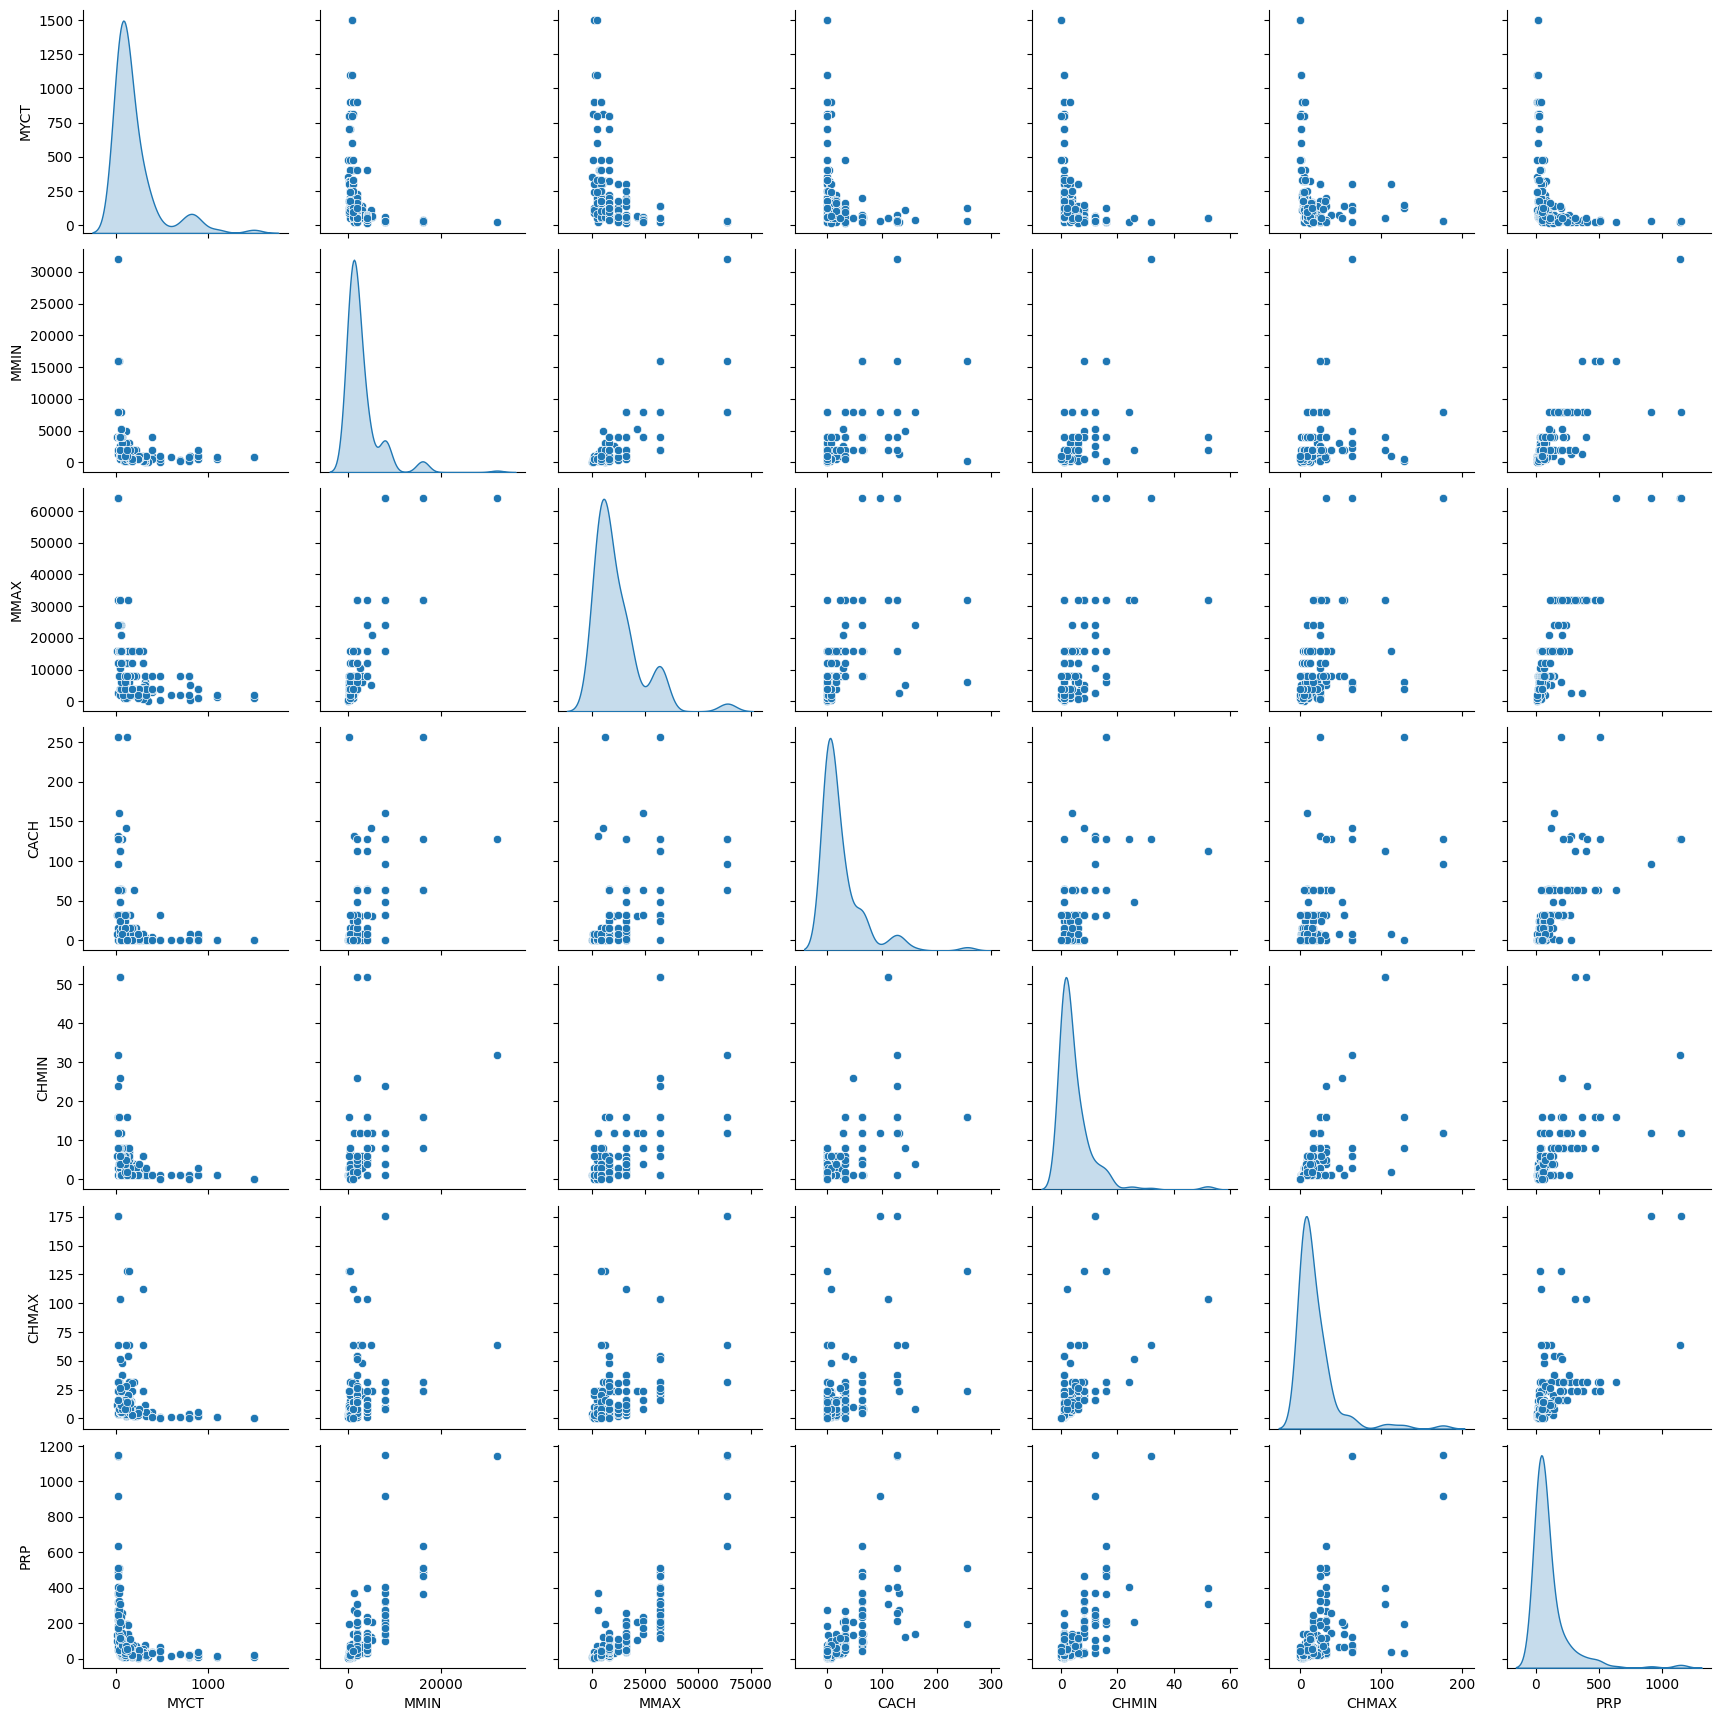

In [43]:
# Lets visualize the data
sns.pairplot(new_dataset[['MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP']], diag_kind="kde")

## 2) NN for a simple Regression

In [44]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
#variables explicativas (independientes) que van a explicar a las dependientes
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX', 'PRP']

#variables expliacadas (dependientes)
dependent_variables = ['ERP']

#conjunto de datos para inferir la variable explicativas
train_set = train[independent_variables]

#los resultados esperados
train_target = train[dependent_variables]

#
test_set = test[independent_variables]

test_target = test[dependent_variables]

In [45]:
train_set

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
103,1100,768,2000,0,1,1,13
12,60,2000,8000,65,1,8,92
3,29,8000,32000,32,8,32,172
165,38,4000,8000,32,16,32,51
154,48,4000,24000,32,8,24,214
...,...,...,...,...,...,...,...
44,133,1000,12000,9,3,12,72
113,225,2000,4000,8,3,6,34
139,115,2000,4000,2,1,5,40
150,40,8000,16000,32,8,16,214


In [46]:
train_target

,ERP
103,20
12,70
3,253
165,80
154,151
...,...
44,54
113,31
139,29
150,126


In [50]:
# Lets build a simple model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
    #ver dimensionalidad de los inputs para el input shape
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
    #capa con units cantidad de neuronas con activacion relu
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),

  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  #la ultima capa define el problema que estoy resolviendo, la funcion de activacion influye
  #se usa linear ya que al ser problema de regresion podemos obtener valores negativo
  tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'),
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model

model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [51]:
# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=15,
          batch_size = 32,
          validation_split=0.2,
        )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 29543.3730 - root_mean_squared_error: 170.1653 - val_loss: 48856.0742 - val_root_mean_squared_error: 221.0341
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 51632.5508 - root_mean_squared_error: 222.8303 - val_loss: 15002.5391 - val_root_mean_squared_error: 122.4849
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12997.2520 - root_mean_squared_error: 112.7425 - val_loss: 81915.4141 - val_root_mean_squared_error: 286.2087
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31643.2129 - root_mean_squared_error: 173.3281 - val_loss: 14291.5977 - val_root_mean_squared_error: 119.5475
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14328.8945 - root_mean_squared_error: 119.0002 - val_loss: 29969.4902 - val_root_mean_squared_error: 173.1170
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13821.3135 - root_mean_squared_error: 116.4423 - val_loss: 12762.4912 - val_root_mean_squared_error: 112.971

In [52]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2141.3813 - root_mean_squared_error: 46.2230


[1995.484130859375, 44.670841217041016]

## 3) NN for multiple Regressions

In [53]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX']
dependent_variables = ['PRP', 'ERP']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [55]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'),
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=10,
          batch_size = 32 ,
          validation_split=0.2
        )

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5989286.5000 - root_mean_squared_error: 2438.0884 - val_loss: 6320967.5000 - val_root_mean_squared_error: 2514.1533
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3836282.5000 - root_mean_squared_error: 1956.8303 - val_loss: 4965101.5000 - val_root_mean_squared_error: 2228.2507
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3304255.2500 - root_mean_squared_error: 1816.5232 - val_loss: 3968444.7500 - val_root_mean_squared_error: 1992.0956
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2854671.5000 - root_mean_squared_error: 1689.1510 - val_loss: 3196759.0000 - val_root_mean_squared_error: 1787.9482
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2896416.5000 - root_mean_squared_error: 1686.6375 - val_loss: 2591468.7500 - val_root_mean_squared_error: 1609.8040
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1785048.3750 - root_mean_squared_error: 1334.7668 - val_loss: 2125678.0000 - v

In [56]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 776746.6875 - root_mean_squared_error: 881.3323


[776746.6875, 881.3323364257812]

In [57]:
model.predict(np.array([[1,1,1,2,5,4]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.4655125 , 0.49916172]], dtype=float32)

# Classification

## 1) Dataset Preparations

In [58]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Iris
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2025-02-05 02:07:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data’

iris.data               [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-02-05 02:07:25 (67.7 MB/s) - ‘iris.data’ saved [4551]



In [59]:
# Loading Dataset and have a glimpse about it
column_names = ['sepal_length','sepal_width','petal_length','petal_width', 'class']

raw_dataset = pd.read_csv("iris.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
# Lets check columns
raw_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [61]:
# Summary of the dataset
raw_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

In [62]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


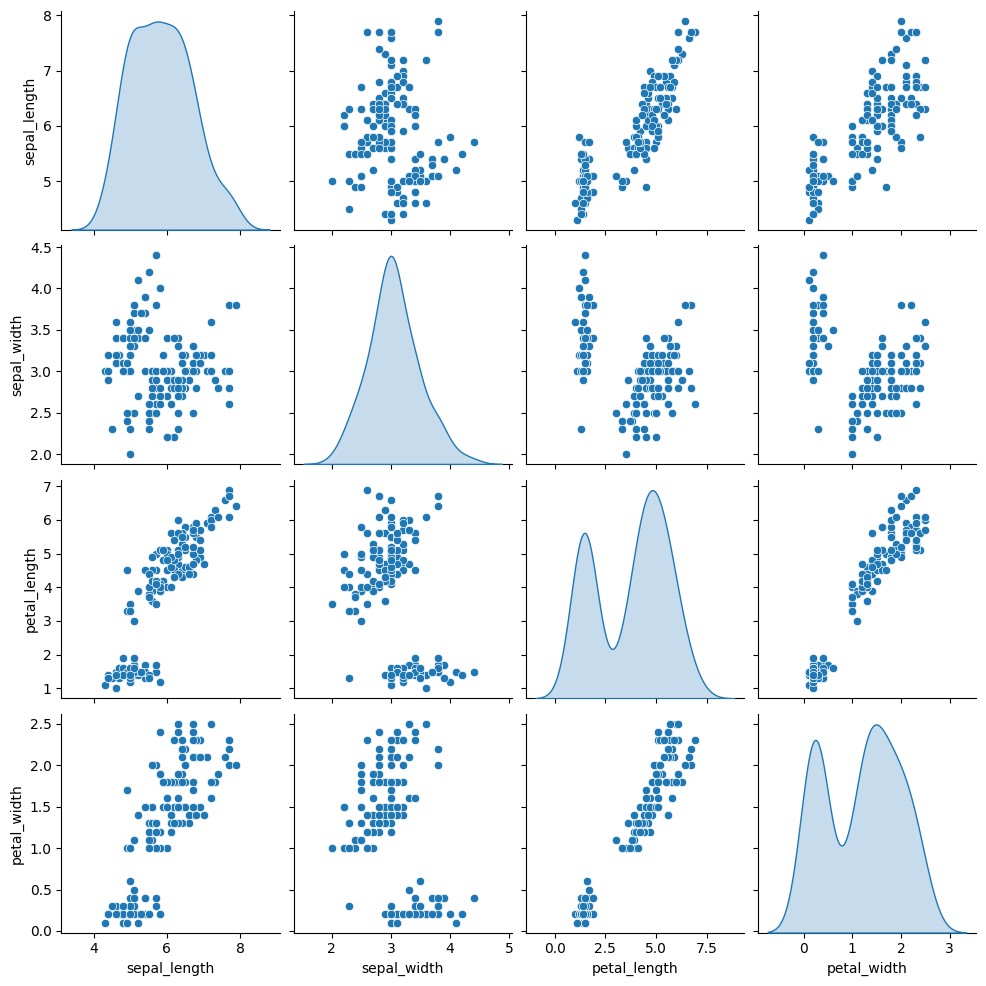

In [63]:
# Lets visualize the data
sns.pairplot(new_dataset[['sepal_length','sepal_width','petal_length','petal_width']], diag_kind="kde")

In [64]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = list(raw_dataset.columns)
independent_variables.remove('class')
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [80]:
train_target.shape

(120,)

In [66]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

In [67]:
train_target, test_target

(array([0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2,
        0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2,
        1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1,
        0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0,
        2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1,
        2, 2, 2, 1, 2, 0, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1,
        2, 1, 2, 1, 2, 1, 1, 0]))

## 2) NN for Classification

In [88]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),

  #para clasificacion en la ultima capa el numero de neuronas es la cnatidad de clases a predecir
  tf.keras.layers.Dense(units=3, activation='softmax')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=32,
          batch_size = 64 ,
          validation_split=0.2
        )

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.3194 - loss: 2.1614 - val_accuracy: 0.3750 - val_loss: 1.9572
Epoch 2/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3524 - loss: 1.9242 - val_accuracy: 0.3750 - val_loss: 1.7939
Epoch 3/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3212 - loss: 1.8379 - val_accuracy: 0.3750 - val_loss: 1.6557
Epoch 4/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3194 - loss: 1.6842 - val_accuracy: 0.3333 - val_loss: 1.5500
Epoch 5/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2795 - loss: 1.5838 - val_accuracy: 0.2500 - val_loss: 1.4664
Epoch 6/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2205 - loss: 1.4961 - val_accuracy: 0.0833 - val_loss: 1.3990
Epoch 7/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1476 - loss: 1.4308 - val_accuracy: 0.0417 - val_loss: 1.3454
Epoch 8/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0625 - loss: 1.3706 - val_accuracy: 0.0417 - val_loss: 1.3001
Epoch 9/3

In [89]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3667 - loss: 1.3833


[1.3833460807800293, 0.36666667461395264]

In [86]:
test_target

array([0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 1, 2, 1, 1, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


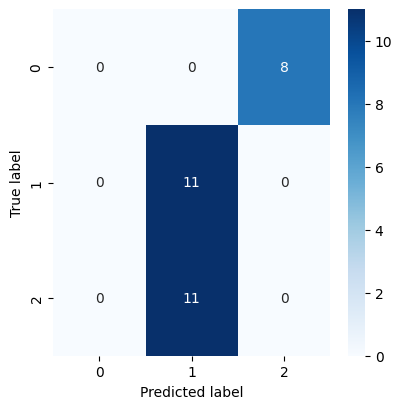

In [90]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Generation

## 1) Data Preparations

In [74]:
import itertools
from keras.preprocessing import image

IMG_HEIGHT = 512
IMG_WIDTH = 256

img_rows = [(i-(IMG_WIDTH/2))/(IMG_WIDTH/2) for i in range(IMG_WIDTH)]
img_cols = [(j-(IMG_HEIGHT/2))/(IMG_HEIGHT/2) for j in range(IMG_HEIGHT)]

flatten_image = np.array(list(itertools.product(img_rows, img_cols)))

## 2) NN for Generation

In [75]:
# Creating a custom Layer
class ScaleLayer(tf.keras.layers.Layer):
  def __init__(self, redScale=255.0, greenScale=255.0, blueScale=255.0):
    super(ScaleLayer, self).__init__()
    self.scale = tf.constant([redScale, greenScale, blueScale], dtype=tf.float32)

  def call(self, inputs):
    outputs = tf.dtypes.cast(inputs, tf.float32)
    outputs = outputs * self.scale
    return tf.dtypes.cast(outputs, tf.uint8)

(-0.5, 511.5, 255.5, -0.5)

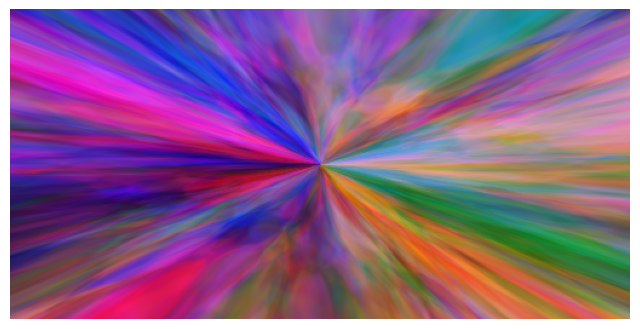

In [79]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(2, )),
  tf.keras.layers.Dense(units=128, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=256, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=512, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal()),
  ScaleLayer(redScale=150, greenScale=100, blueScale=150)
  ])

generated_image = np.reshape(np.array(model(flatten_image)), newshape=(IMG_WIDTH, IMG_HEIGHT, 3))

plt.figure(figsize=(8, 8))
plt.imshow(image.array_to_img(generated_image))
plt.axis("off")